Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1345 - loss: 55.3596 - val_accuracy: 0.1519 - val_loss: 3.6501
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1385 - loss: 8.9687 - val_accuracy: 0.1372 - val_loss: 3.4617
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1289 - loss: 4.8959 - val_accuracy: 0.1115 - val_loss: 3.5096
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1179 - loss: 4.0516 - val_accuracy: 0.1075 - val_loss: 3.5094
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1077 - loss: 3.7755 - val_accuracy: 0.1148 - val_loss: 3.4960
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1278 - loss: 3.6358 - val_accuracy: 0.1222 - val_loss: 3.4737
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1190 - loss: 3.6127 - val_accuracy: 0.1195 - val_loss: 3.4738
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1262 - loss: 3.5714 - val_accuracy: 0

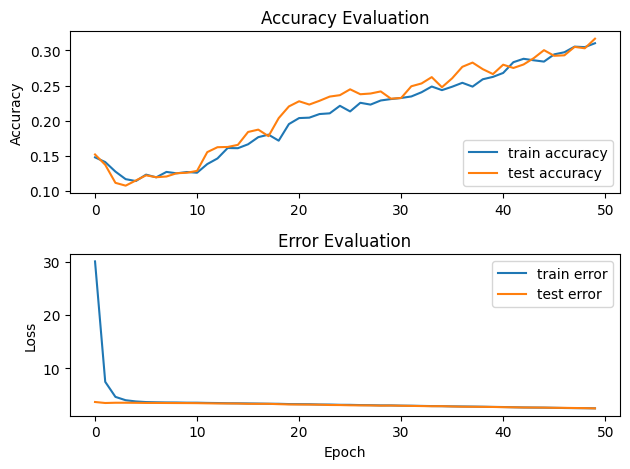

In [11]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "data_10.json"

def load_data(dataset_path):
    # Open the file
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)

    # Convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Evaluation")

    # create error subplot
    # Error == Loss
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Evaluation")

    plt.tight_layout()
    plt.show()
    
    
if __name__ == "__main__":
    # load data
    inputs, targets = load_data(DATASET_PATH)

    # split the data into training and test sets
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)
    
    # Using tensorflow, build the network architecture 
    model = keras.Sequential([
        # input layer
        # Flatten the 2D array. Remember, the MFCC is a list of lists of numbers.
        # The "inputs" variable is actually a 3d Array, index = 0 -> the segments
        # 1st Dimension = intervals 
        # 2nd is the MFCC for that interval

        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # IMPORTANT: Relu 
        
        # 1st Hidden Layer
        # 512 is how many neurons
        # 3rd param is regularization
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd Hidden Layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd Hidden Layer
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.L2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        # 10 genres = 10 output neurons
        # SoftMax = Normalize the output for us, 
        # Todo: see what happens when you use != 10 neurons
        keras.layers.Dense(10, activation="softmax")
    ])
    
    # compile network 
    # Sparse CC = for categorization NN training
    optimiser = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimiser, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

    # Show the model structure
    model.summary()
    
    # train network 
    # Batch Size = 
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

    # Battle Overfitting
    # plot accuracy and error over the epochs 
    plot_history(history)
    